In [ ]:
#TASK 1

import sklearn as skl
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te_ary)


df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)

frequent_itemsets = apriori(df, min_support=0.6)
display(frequent_itemsets)

itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

print('---')

print('Task 1:')

print('')


def calcKulczynski(frequent_itemsets, setA, setB):
  itemsets = frequent_itemsets['itemsets'] #retrieve itemsets column  
  support = frequent_itemsets['support'] #retrieve support column

  indexA = itemsets.index[itemsets == setA].tolist() #get index for frozenset of antecedents from itemsets, as a list
  indexB = itemsets.index[itemsets == setB].tolist() #get index for frozenset of consequents from itemsets, as a list

  if not indexA or not indexB: #raise exception if a chosen frozenset didn't pass min support
    raise Exception('Frozensets did not have a strong association, choose ones that passed the minimum support')

  supportA = support[indexA[0]] #get support value by matching up support index and itemsets index
  supportB = support[indexB[0]]

  AUB = setA.union(setB) #union of A,B
  indexAUB = itemsets.index[itemsets == AUB].tolist()
  supportAUB = support[indexAUB[0]]

  kulc = 0.5*((supportAUB/supportA)+(supportAUB/supportB)) #Kulczynski formula

  print('Kulczynski Measure for frozenset of antecedents:', setA, 'and frozenset of consequents', setB, 'is:', kulc)

calcKulczynski(frequent_itemsets, {3,5}, {8,3})

[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


Itemset: frozenset({3, 5}). Support: 0.8.
---
Task 1:

Kulczynski Measure for frozenset of antecedents: {3, 5} and frozenset of consequents {8, 3} is: 0.875


In [ ]:
#TASK 2

import sklearn as skl
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te_ary)


df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)

frequent_itemsets = apriori(df, min_support=0.6)
display(frequent_itemsets)

itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

print('---')

print('Task 2:')

print('')


def calcImbalanceRatio(frequent_itemsets, setA, setB):
  itemsets = frequent_itemsets['itemsets'] #retrieve itemsets column  
  support = frequent_itemsets['support'] #retrieve support column

  indexA = itemsets.index[itemsets == setA].tolist() #get index for frozenset of antecedents from itemsets, as a list
  indexB = itemsets.index[itemsets == setB].tolist() #get index for frozenset of consequents from itemsets, as a list

  if not indexA or not indexB: #raise exception if a chosen frozenset didn't pass min support
    raise Exception('Frozensets did not have a strong association, choose ones that passed the minimum support')

  supportA = support[indexA[0]] #get support value by matching up support index and itemsets index
  supportB = support[indexB[0]]

  AUB = setA.union(setB) #union of A,B
  indexAUB = itemsets.index[itemsets == AUB].tolist()
  supportAUB = support[indexAUB[0]]

  IR = abs(supportA-supportB)/(supportA+supportB-supportAUB) #Imbalance Ratio formula

  print('Imbalance Ratio for frozenset of antecedents:', setA, 'and frozenset of consequents', setB, 'is:', IR) 

calcImbalanceRatio(frequent_itemsets, {3}, {5})

[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


Itemset: frozenset({3, 5}). Support: 0.8.
---
Task 2:

Imbalance Ratio for frozenset of antecedents: {3} and frozenset of consequents {5} is: 0.19999999999999996


#TASK 3

The size of all possible valid item sets for set of items I = {$1,2,...,N$} is: 

$2^{n}-1$


But to understand why, we need to consider a subset of the set $X$ = {$𝑎_1,a_2,⋯,𝑎_𝑛$}. $X$ has $n$ elements. To create a subset, we can go through each of the elements in $X$ and either choose to put it in the subset or not put it in the subset.

Hence, there are have two choices for $a$ given $a_k$: to put it in the subset or not. So, if we have 2 choices for each of the $n$ elements. Meaning the total number of subsets possible is: $(2 \cdot 2 \cdot 2... \cdot 2)$ to the $n^{th}$ number of 2.

$\therefore$ All the possible subsets would be: $2^{n}$, which includes the empty set. But, the empty set is invalid so it needs to be discounted.

Hence, we're left with the answer $2^{n}-1$.


In [ ]:
#Task 4 
print("TASK 4")

rain_monthly_list = [20.95, 22.41, 25.21, 25.78, 28.43, 22.67, 24.55, 5.49, 23.11, 26.42, 23.90, 23.53]


total = 0

for index in range(len(rain_monthly_list)):
  total += rain_monthly_list[index]

mean = total/len(rain_monthly_list)

print("Mean of monthly precipitation (in mm) is:",mean)

standard_dev = np.std(rain_monthly_list)

print("Standard Deviation of monthly precipitation (in mm) is:",standard_dev)

three_std = 3*standard_dev

print("Three Standard Deviation of monthly precipitation (in mm) is:",three_std)

outliers = []

for index in range(len(rain_monthly_list)):
  if abs(rain_monthly_list[index] - mean) > three_std:
    outliers.append(rain_monthly_list[index])
  
print("List of Outliers from datasets, using maximum likelihood method:", outliers)


TASK 4
Mean of monthly precipitation (in mm) is: 22.70416666666667
Standard Deviation of monthly precipitation (in mm) is: 5.534051346487089
Three Standard Deviation of monthly precipitation (in mm) is: 16.602154039461265
List of Outliers from datasets, using maximum likelihood method: [5.49]


#TASK 4 ctd.


The only outlier is, 5.49 mm, for the dataset. The upper bound is $mean+(3*std) = 22.704 + 16.602 = 39.306$. While the lower bound is $mean - (3*std) = 22.704 - 16.602 = 6.102$. 

Hence, 5.49 mm, is the only value outside the bounds of three standard deviation away from the mean.

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000
...,...,...,...
12/23/2016,63.240002,12.46,22.600000
12/27/2016,63.279999,12.39,22.610001
12/28/2016,62.990002,12.25,22.330000


,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536
...,...,...,...
12/23/2016,-0.487800,0.483871,0.266189
12/27/2016,0.063246,-0.561798,0.044252
12/28/2016,-0.458276,-1.129944,-1.238394




Shape of delta dataset values: (2517, 3)
Labels showing inliers and outliers: [1 1 1 ... 1 1 1]
Shape after discounting outlier: (2069, 3)



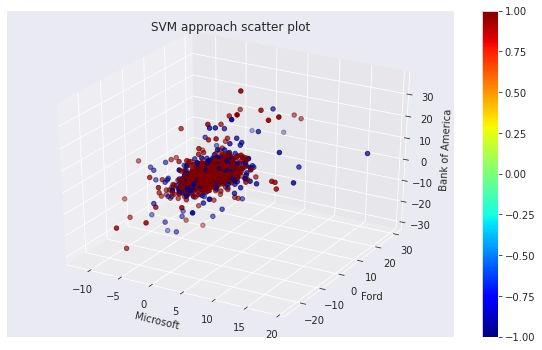

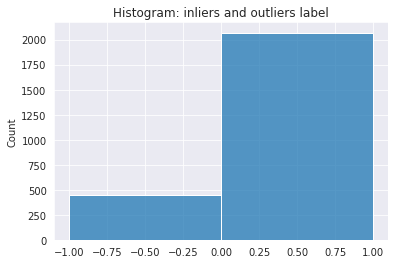

<Figure size 720x432 with 0 Axes>

In [ ]:
#Task 5 

import pandas as pd
from sklearn.svm import OneClassSVM
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

print('')
#Display original stock dataset
display(stocks)

N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

# display(delta)

print('')

display(delta)

print('')

# Extracting the values from the dataframe
delta_data = delta.values

print('')
# Split dataset into input and output elements
X = delta_data[:, :]

# Summarize the shape of the dataset
print("Shape of delta dataset values:", X.shape)



ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(X) # Perform fit on input data and returns labels for that input data.

print("Labels showing inliers and outliers:", yhat) # Print labels: -1 for outliers and 1 for inliers. 

# Select all rows that are not outliers
mask = yhat != -1
X = X[mask, :]

# Summarize the shape of the updated dataset
print("Shape after discounting outlier:", X.shape)

print('')
#plotting 3d scatter plot using inliers and outliers labels (yhat) as colours 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=yhat, cmap='jet')
ax.set_title("SVM approach scatter plot")
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

print('')

sns.set_style('darkgrid')
sns.histplot(yhat, bins=2, kde=False)
plt.title('Histogram: inliers and outliers label')
plt.figure(figsize=(10,6))
plt.show()

#TASK 5 ctd.


The resulting plot from the one-class SVM approach is similar to the parametric and proximity-based methods used in the lab notebook. The main difference in the outliers and inliers labels are discrete being 1 or -1, so the detection is not as refined and precise as the continuous results of the other approaches.  

This makes sense as it's the same bounded dataset with the same set outlier values, so for SVM to be somewhat accurate it should be matching how the outlier-detection approaches in the lab show the same inliers and outliers. (Assuming the previous methods are reliable AND valid). 


From the results of X with yhat and delta from my code, percentage of the dataset that is classified as outliers is: 

(2517 - 2069)/2517 * 100 = 17.8%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
Original Housing dataset:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0



Column 13 class attribute MEDV:
13  
50.0    16
25.0     8
22.0     7
23.1     7
21.7     7
        ..
25.3     1
25.2     1
25.1     1
6.3      1
7.4      1
Length: 229, dtype: int64

Scaled PCA Dataset (head and tail):


,0,1,13
0,-2.098297,0.773115,24.0
1,-1.457252,0.591985,21.6
2,-2.074598,0.599639,34.7
3,-2.611504,-0.006870,33.4
4,-2.458185,0.097712,36.2
...,...,...,...
501,-0.314968,0.724285,22.4
502,-0.110513,0.759308,20.6
503,-0.312360,1.155247,23.9
504,-0.270519,1.041362,22.0


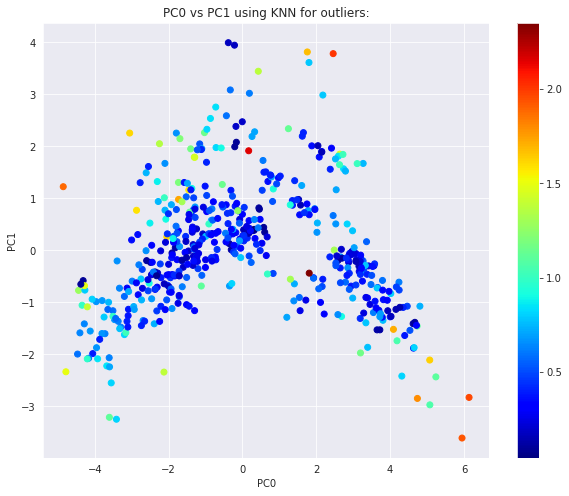

In [ ]:
#Task 6

from pandas import read_csv
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df_housing = read_csv(url, header=None)

df_housing.info(verbose=True)
print('Original Housing dataset:')
display(df_housing)
print('')
print('Column 13 class attribute MEDV:')
print(df_housing[[13]].value_counts())

print('')

# define PCA object with top 2 principal components
#numComponents = 2
#pca = PCA(n_components=numComponents)

pca = PCA(n_components=2)

#dropping class attribute
df_copy = df_housing
df_copy = df_copy.drop([13],axis=1)

#preprocess and scale df
df_scaled = preprocessing.scale(df_copy)

# fit the PCA model to our data and apply the dimensionality reduction
prin_comp = pca.fit_transform(df_scaled)

# create a dataframe containing the principal components 
pca_df = pd.DataFrame(data = prin_comp) 
pca_df[13] = df_housing[13]

print('Scaled PCA Dataset (head and tail):')
display(pca_df)
print('')

# Implement a k-nearest neighbour approach using k=2 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pca_df.values)
distances, indices = nbrs.kneighbors(pca_df.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_scores = distances[:,knn-1]

print('')

#plot scatter plot using outlier_scores for the coulours
plt.figure(figsize=(10,8))
plot = plt.scatter(prin_comp[:,0], prin_comp[:,1], c=outlier_scores, cmap = 'jet')
plt.colorbar(plot)
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("PC0 vs PC1 using KNN for outliers:")
plt.show()

#TASK 7


**a)** The html tags define root and end of html document respectively. The body tags defines the document's body i.e. contents. The h1 tags define the main heading for the document. The p tags define a paragraph of text.

The table tags create a HTML table, which contains the elements: tr - defining a table row, th - defining the a table header and td - defining a table cell. There are also the thead and tbody tags; the thead tag is used to group header content in a HTML table while the tbody tag is used to group body contents in an HTML table.


In [ ]:
#Task 7 b)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline

url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
print(type(soup))

# Print the first 10 table rows
rows = soup.find_all('tr')  # the 'tr' tag in html denotes a table row

print('')

for row in rows:
    row_td = row.find_all('td')  # the 'td' tag in html code denotes a table cell
    print(row_td)
type(row_td)

print('')

str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print('Cleaned text by removing html tags:', cleantext)

print('')

# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
header_list.append(cleantext_header) # Add the clean table header to the list

print(header_list)

print('')

# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()  # extract the text without HTML tags
    table_list.append(row_cleantext)  # Add the clean table row to the list
    
print(table_list)

print('')

df_header = pd.DataFrame(header_list)

df_header2 = df_header[0].str.split(',', expand=True) #clean up df_header by splitting the "0" column into multiple columns at the comma position

df_table = pd.DataFrame(table_list) #create df of table
df_table2 = df_table[0].str.split(',', expand=True) #clean

# Remove uneccesary characters
df_table2[0] = df_table2[0].str.strip('[')
df_table2[0] = df_table2[0].str.strip(']')
df_table2[3] = df_table2[3].str.strip(']')

# Remove all rows with any missing values
df_table3 = df_table2.dropna(axis=0, how='any')

# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[3] = df_header2[3].str.strip(']')

# We concatenate the two dataframes
frames = [df_header2, df_table3]
df = pd.concat(frames)

df2 = df.rename(columns=df.iloc[0]) # We assign the first row to be the dataframe header
df3 = df2.drop(df2.index[0]) # We drop the replicated header from the first row of the dataframe

print('HTML Table tranformed to Pandas DataFrame:')
df3.head(10)

<class 'bs4.BeautifulSoup'>

[]
[<td>India</td>, <td align="right">49</td>, <td align="right">86400</td>, <td>No</td>]
[<td>Brazil</td>, <td align="right">32</td>, <td align="right">57600</td>, <td>Yes</td>]
[<td>USA</td>, <td align="right">35</td>, <td align="right">64800</td>, <td>No</td>]
[<td>Brazil</td>, <td align="right">43</td>, <td align="right">73200</td>, <td>No</td>]
[<td>USA</td>, <td align="right">45</td>, <td align="right"></td>, <td>Yes</td>]
[<td>India</td>, <td align="right">40</td>, <td align="right">69600</td>, <td>Yes</td>]
[<td>Brazil</td>, <td align="right"></td>, <td align="right">62400</td>, <td>No</td>]
[<td>India</td>, <td align="right">53</td>, <td align="right">94800</td>, <td>Yes</td>]
[<td>USA</td>, <td align="right">55</td>, <td align="right">99600</td>, <td>No</td>]
[<td>India</td>, <td align="right">42</td>, <td align="right">80400</td>, <td>Yes</td>]

Cleaned text by removing html tags: [India, 42, 80400, Yes]

['[Region, Age, Income, Online Shopper]']

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


In [29]:
# Install/upgrade wikipedia and statsmodels packages for the lab
!pip install wikipedia
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
#Task 8

import pandas as pd
import wikipedia

articles=['supervised learning', 'unsupervised learning', 'semi-supervised learning', 'association rule learning', 'anomaly detection', 'cluster analysis', 'dimensionality reduction', 'regression analysis', 'statistical classification', 'data warehouse', 'online analytical processing']
wiki_lst=[]
title=[]

# Load wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)

loading content:  supervised learning
loading content:  unsupervised learning
loading content:  semi-supervised learning
loading content:  association rule learning
loading content:  anomaly detection
loading content:  cluster analysis
loading content:  dimensionality reduction
loading content:  regression analysis
loading content:  statistical classification
loading content:  data warehouse
loading content:  online analytical processing


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst) # Create tf-idf feature of the wikipedia dataset

print(X.shape) # Print dimensions of tf-idf feature

(11, 4021)


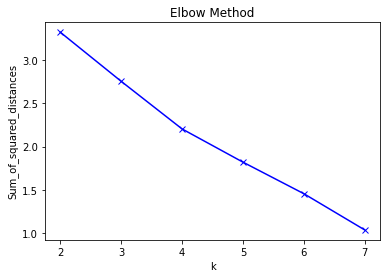

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,8)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [39]:
# Fit k-means model with k=4
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                           title  cluster
0            supervised learning        0
1          unsupervised learning        0
7            regression analysis        0
9                 data warehouse        1
10  online analytical processing        1
4              anomaly detection        2
2       semi-supervised learning        3
3      association rule learning        3
5               cluster analysis        3
6       dimensionality reduction        3
8     statistical classification        3


#TASK 8 ctd.


From the results, the clustering produced by k-means is not perfect; some decisions are sensible (e.g. Supervised learning and unsupervised learning are in the same cluster), some less so (e.g. regression analysis and unsupervised learning are not in the same cluster; regression analysis belongs to the same cluster with statistical classification). However, with more data, more advanced clustering methods, and more elaborate feature extraction and pre-processing, there might be a possibility to mine useful information from the text data.